# Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas
from sentence_transformers import SentenceTransformer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
import re
%matplotlib inline
import os
package_dir = os.path.dirname(os.path.realpath('__file__'))
thefile = os.path.join(package_dir, '../data/cleaned.csv')
#thefile = os.path.join(package_dir,'cleaned.cvs')

I0202 17:16:28.056858 4621145536 file_utils.py:35] PyTorch version 1.3.0 available.


In [2]:
def preprocessing():
    """
    Transform the csv data to one corpus
    """
    df=pandas.read_csv(thefile)
    df=df[['content','title','date']]
    df=df[df.content.str.len()>100]
    df=df[~df.title.isin(['Featured Cannabis Companies','Alan Brochstein, CFA - Media Mentions'])]   #exclude some not useful data
    df=df.drop_duplicates(subset='title',keep='first')
    df.title=df.title.apply(lambda x: [x])
    corpus=df.title.agg(sum)
    return corpus,df

In [3]:
corpus,df=preprocessing()
df1=df.drop(2338) #this row with wrong datetime structure
date_peroid=(df1['date'] > '2017-1-1') & (df1['date'] <= '2018-1-1')
df1['date']=pandas.to_datetime(df1['date'])
df1[date_peroid].sort_values(by='date')
df1=df1[df1.title.apply(lambda x: len(str(x[0]).split())>=7)]

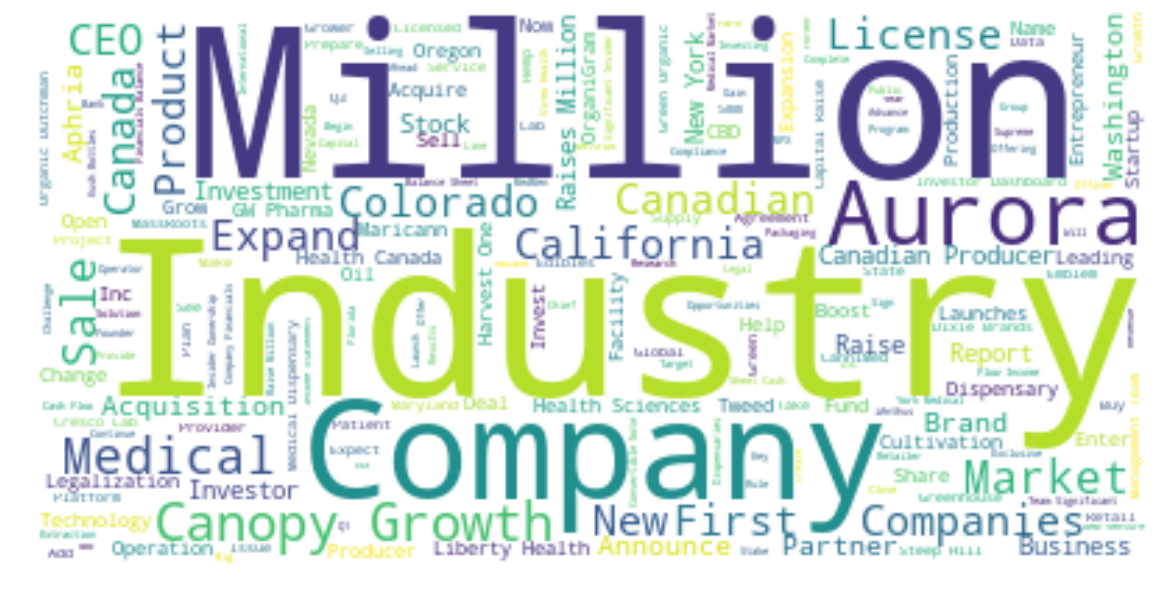

In [4]:
text1=df1.title.apply(lambda x: x[0]).str.cat(sep='. ')
stopwords=set(STOPWORDS)
stopwords.update(['cannabis','marijuana'])
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text1)
wordcloud.to_file('cloud.png')
#plt.savefig('cloud1.png', dpi=300, bbox_inches='tight')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

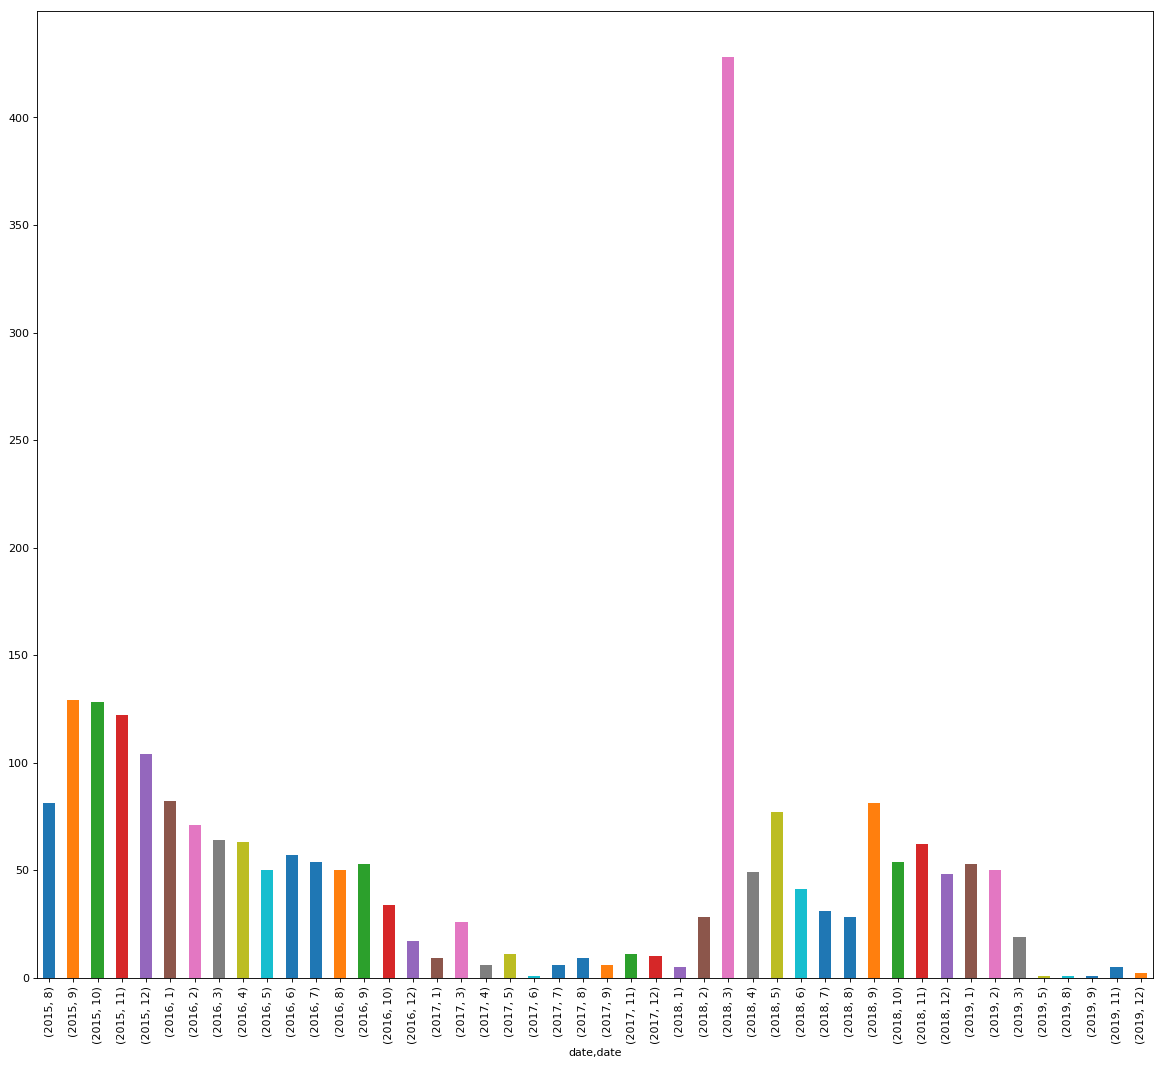

In [5]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
df1.date.groupby([df1["date"].dt.year, df1["date"].dt.month]).count().plot(kind="bar")
plt.savefig('timeD.png', dpi=300, bbox_inches='tight')

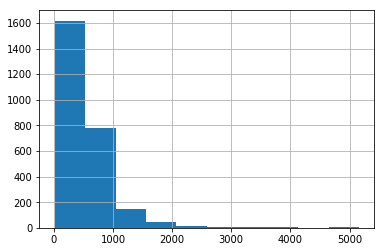

In [6]:
df['clean_content']=df.content.apply(lambda x: re.sub('[\W_]+', ' ', str(x)))
df.clean_content.apply(lambda x: len(str(x).split())).hist()